<a href="https://colab.research.google.com/github/IdaVillumsen/DL_algorithmicFairness/blob/main/Copy_of_DL_Algorithmic_Fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import torchvision
import torch

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize

import data_loader

%load_ext autoreload
%autoreload 2

In [ ]:
# Connecter with google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile("drive/My Drive/DL_project/img_align_celeba.zip","r") as zip_ref:
  zip_ref.extractall("images/")

In [ ]:
root = 'images/img_align_celeba'
img_list = os.listdir(root)
print(len(img_list))

202599


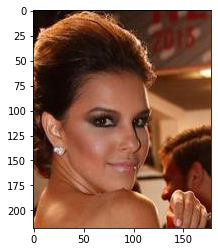

In [ ]:
root = 'images/img_align_celeba/065263.jpg'
#img_list = os.listdir(root)
image = imread('images/img_align_celeba/065287.jpg') 
plt.imshow(image, cmap='gray')

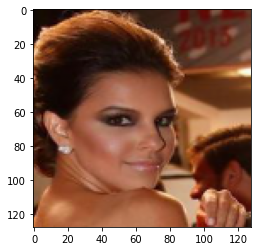

In [ ]:
# Resize image
root = 'images/img_align_celeba/065263.jpg'
#img_list = os.listdir(root)
image = imread('images/img_align_celeba/065287.jpg') 
image_size = (128, 128)
image = resize(image,image_size)
plt.imshow(image, cmap='gray')

In [ ]:
# Load attributes from the csv file in google drive 
Attributes = pd.read_csv('/content/drive/My Drive/DL_project/list_attributs.csv')
drive_path = 'drive/My Drive/DL_project/'

In [ ]:
Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   img                  202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
# looking into the data
print("Percentage of females:", sum([Attributes["Male"] == -1]).value_counts(normalize = True)[1]*100)
print("Percentage of females who is attractive:", Attributes["Attractive"][Attributes["Male"] == -1].value_counts(normalize = True)[1]*100)
print("Percentage of males who is attractive:", Attributes["Attractive"][Attributes["Male"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of young people who is attractive:", Attributes["Attractive"][Attributes["Young"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of old people who is attractive:", Attributes["Attractive"][Attributes["Young"] == -1].value_counts(normalize = True)[1]*100)
print("Percentage of pople that are chubby who is attractive:", Attributes["Attractive"][Attributes["Chubby"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of people with pale skin and a big nose:", Attributes["Pale_Skin"][Attributes["Big_Nose"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of people who is attrative and has bushy eyebrows:", Attributes["Attractive"][Attributes["Bushy_Eyebrows"] == 1].value_counts(normalize = True)[1]*100)

Percentage of females: 58.32457218446291
Percentage of females who is attractive: 67.91689586595015
Percentage of males who is attractive: 27.925953999573633
Percentage of young people who is attractive: 61.73453111641379
Percentage of old people who is attractive: 15.423525564155675
Percentage of pople that are chubby who is attractive: 3.343908085398268
Percentage of people with pale skin and a big nose: 2.42023739372001
Percentage of people who is attrative and has bushy eyebrows: 56.44203728778252


#Loading data

In [ ]:
image_size = image.shape
IMAGE_SHAPE = [image_size[0], image_size[1], 3]
IMAGE_PATHS = "images/img_align_celeba/"

In [ ]:
selec_attrs = ['Attractive']
batch_size = 128

trainloader = data_loader.get_loader(image_dir=IMAGE_PATHS,
                                    attr_path=drive_path+"list_attr_celeba.txt",
                                    split_path=drive_path+"list_eval_partition.txt",
                                    selected_attrs=selec_attrs, 
                                    image_size=image_size[0],
                                    batch_size=batch_size, 
                                    dataset='CelebA', 
                                    mode='train', 
                                    num_workers=1)

validloader = data_loader.get_loader(image_dir=IMAGE_PATHS,
                                    attr_path=drive_path+"list_attr_celeba.txt",
                                    split_path=drive_path+"list_eval_partition.txt",
                                    selected_attrs=['Attractive', 'Male'], 
                                    image_size=image_size[0],
                                    batch_size=batch_size, 
                                    dataset='CelebA', 
                                    mode='valid', 
                                    num_workers=1)

testloader = data_loader.get_loader(image_dir=IMAGE_PATHS,
                                    attr_path=drive_path+"list_attr_celeba.txt",
                                    split_path=drive_path+"list_eval_partition.txt",
                                    selected_attrs=['Attractive', 'Male'], 
                                    image_size=image_size[0],
                                    batch_size=batch_size, 
                                    dataset='CelebA', 
                                    mode='test', 
                                    num_workers=1)

Finished preprocessing the CelebA dataset...
Finished preprocessing the CelebA dataset...
Finished preprocessing the CelebA dataset...


In [ ]:
train_obs = len(trainloader.dataset)
valid_obs = len(validloader.dataset)
test_obs = len(testloader.dataset)
print('Number of training observations is',train_obs)
print('Number of validation observations is',valid_obs)
print('Number of test observations is',test_obs)
print('Total number of observations is',train_obs+valid_obs+test_obs)

Number of training observations is 162770
Number of validation observations is 19867
Number of test observations is 19962
Total number of observations is 202599


In [ ]:
for data in trainloader:
    print('Elements of list 1:')
    print('Batchsize =', len(data[0]))
    print('Number of channels =', len(data[0][0]))
    print('Height of image =', len(data[0][0][0]))
    print('Width of image =', len(data[0][0][0][0]))
    print('Elements of list 2:')
    print('Attribute: Attractive')
    print(torch.flatten(data[1]))
    break

Elements of list 1:
Batchsize = 128
Number of channels = 3
Height of image = 128
Width of image = 128
Elements of list 2:
Attribute: Attractive
tensor([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0], dtype=torch.int32)


tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 0], dtype=torch.int32)


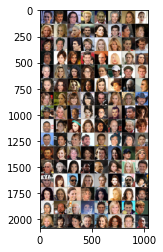

In [ ]:
def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
images, labels, _ = iter(trainloader).next()

# show images
imshow(torchvision.utils.make_grid(images))

print(torch.flatten(labels))

# Define a CNN

In [ ]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")


def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

Running GPU.


In [ ]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from torch.nn import Linear, Conv2d, BatchNorm1d, MaxPool2d, Dropout
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax


# hyperameters of the model
channels = images.shape[1]
height = images.shape[2]
width = images.shape[3]

num_filters_conv1 = 16
kernel_size_conv1 = 3 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]
padding_conv1 = 1

num_filters_conv2 = 16
kernel_size_conv2 = 5 # [height, width]
stride_conv2 = 1 # [stride_height, stride_width]
padding_conv2 = 2

num_filters_conv3 = 32
kernel_size_conv3 = 3 # [height, width]
stride_conv3 = 1 # [stride_height, stride_width]
padding_conv3 = 1

num_filters_conv4 = 64
kernel_size_conv4 = 3 # [height, width]
stride_conv4 = 1 # [stride_height, stride_width]
padding_conv4 = 1

kernel_pool = 2
stride_pool = 2

num_l1 = 1024
num_l2 = 512
num_l3 = 64

def compute_dim(dim_size, kernel, padding, stride):
    return int((dim_size - kernel + 2 * padding) / stride + 1)


# Define network
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.num_classes = num_classes
        
        # convolution layer 1
        self.conv1_1 = Conv2d(in_channels=channels,
                            out_channels=num_filters_conv1,
                            kernel_size=kernel_size_conv1,
                            stride=stride_conv1,
                            padding=padding_conv1)
        #self.conv1_2 = Conv2d(in_channels=num_filters_conv1,
        #                    out_channels=num_filters_conv1,
        #                    kernel_size=kernel_size_conv1,
        #                    stride=stride_conv1,
        #                    padding=padding_conv1)
        self.conv1_out_height = compute_dim(height, kernel_size_conv1, padding_conv1, stride_conv1)
        self.conv1_out_width = compute_dim(width, kernel_size_conv1, padding_conv1, stride_conv1)
        
        # max pooling of convolution layer 1
        self.pool = MaxPool2d(kernel_size=kernel_pool,
                       stride=stride_pool)
        self.pool1_out_height = compute_dim(self.conv1_out_height, kernel_pool, 0, stride_pool)
        self.pool1_out_width = compute_dim(self.conv1_out_width, kernel_pool, 0, stride_pool)

        # convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=num_filters_conv1,
                               out_channels=num_filters_conv2,
                               kernel_size=kernel_size_conv2,
                               stride=stride_conv2,
                               padding=padding_conv2)
        self.conv2_out_height = compute_dim(self.pool1_out_height, kernel_size_conv2, padding_conv2, stride_conv2)
        self.conv2_out_width = compute_dim(self.pool1_out_width, kernel_size_conv2, padding_conv2, stride_conv2)
        
        # max pooling of convolution layer 2
        #self.pool = MaxPool2d(kernel_size=kernel_pool,
        #               stride=stride_pool)
        self.pool2_out_height = compute_dim(self.conv2_out_height, kernel_pool, 0, stride_pool)
        self.pool2_out_width = compute_dim(self.conv2_out_width, kernel_pool, 0, stride_pool)

        # convolution layer 3
        self.conv3 = nn.Conv2d(in_channels=num_filters_conv2,
                               out_channels=num_filters_conv3,
                               kernel_size=kernel_size_conv3,
                               stride=stride_conv3,
                               padding=padding_conv3)
        self.conv3_out_height = compute_dim(self.pool2_out_height, kernel_size_conv3, padding_conv3, stride_conv3)
        self.conv3_out_width = compute_dim(self.pool2_out_width, kernel_size_conv3, padding_conv3, stride_conv3)
        
        # max pooling of convolution layer 3
        self.pool3_out_height = compute_dim(self.conv3_out_height, kernel_pool, 0, stride_pool)
        self.pool3_out_width = compute_dim(self.conv3_out_width, kernel_pool, 0, stride_pool)

        # convolution layer 4
        self.conv4 = nn.Conv2d(in_channels=num_filters_conv3,
                               out_channels=num_filters_conv4,
                               kernel_size=kernel_size_conv4,
                               stride=stride_conv4,
                               padding=padding_conv4)
        self.conv4_out_height = compute_dim(self.pool3_out_height, kernel_size_conv4, padding_conv4, stride_conv4)
        self.conv4_out_width = compute_dim(self.pool3_out_width, kernel_size_conv4, padding_conv4, stride_conv4)
        
        # max pooling of convolution layer 4
        self.pool4_out_height = compute_dim(self.conv4_out_height, kernel_pool, 0, stride_pool)
        self.pool4_out_width = compute_dim(self.conv4_out_width, kernel_pool, 0, stride_pool)


        # linear layers
        # self.l1_in_features = channels * height * width
        self.l1_in_features = num_filters_conv4 * self.pool4_out_height * self.pool4_out_width 
        self.l_1 = Linear(in_features=self.l1_in_features, 
                          out_features=num_l1,
                          bias=True)
        self.bn1 = BatchNorm1d(num_l1)
        self.l_2 = Linear(in_features=num_l1, 
                            out_features=num_l2,
                            bias=True)
        self.bn2 = BatchNorm1d(num_l2)
        self.l_3 = Linear(in_features=num_l2, 
                            out_features=num_l3,
                            bias=True)
        self.bn3 = BatchNorm1d(num_l3)
        self.l_out = Linear(in_features=num_l3, 
                            out_features=2,
                            bias=False)
        
        # Dropout
        self.dropout = Dropout(p = 0.5)
        

    def forward(self, x):
        x = self.pool(relu(self.conv1_1(x)))
        x = self.pool(relu(self.conv2(x)))
        x = self.pool(relu(self.conv3(x)))
        x = self.pool(relu(self.conv4(x)))
        x = self.dropout(x)
        x = x.view(-1, self.l1_in_features)
        x = relu(self.bn1(self.l_1(x)))
        x = relu(self.bn2(self.l_2(x)))
        x = relu(self.bn3(self.l_3(x)))
        x = softmax(self.l_out(x))
        return x
    

net = Net(2)
if use_cuda:
    net.cuda()
print(net)

Net(
  (conv1_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (l_1): Linear(in_features=4096, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l_2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l_3): Linear(in_features=512, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l_out): Linear(in_features=64, out_features=2, bias=False)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def accuracy(ys, ts):
    predictions = torch.max(ys, 1)[1]
    correct_prediction = torch.eq(predictions, ts)
    return torch.mean(correct_prediction.float())

In [ ]:
num_epoch = 10

count = 0

train_loss, train_accs = [], []
valid_iter = []
#valid_lengths = []
valid_loss, valid_accs = [], []

for epoch in range(num_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        count += 1

        # get the inputs
        inputs, labels, _ = data
        labels = get_variable(torch.flatten(labels).type(torch.LongTensor))

        # forward + backward + optimize
        outputs = net(get_variable(Variable(inputs)))
        #labels_argmax = torch.max(outputs.data, 1)[1]

        loss = criterion(outputs, labels)
        
        train_loss.append(float(get_numpy(loss.detach())))#.detach().numpy()))
        train_accs.append(float(get_numpy(accuracy(outputs, labels).detach())))#.detach().numpy()))

        # zero the parameter gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        # Plots updated for each epoch
        if count % 100 == 0:
            print('Epoch %d, batch number %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

            valid_iter.append(count)

            val_loss, val_acc, val_lengths = 0, 0, 0
            net.eval()
            with torch.no_grad():
                for j, data in enumerate(validloader):
                    num = len(data[0])
                    images, labels, _ = data
                    labels = get_variable(torch.flatten(labels[:,0]).type(torch.LongTensor))
                    outputs = net(get_variable(Variable(images)))
                    #labels_argmax = torch.max(outputs.data, 1)[1]
                    val_loss += criterion(outputs, labels)*num
                    val_acc += accuracy(outputs, labels)*num
                    val_lengths += num

            val_loss /= val_lengths
            val_acc /= val_lengths
            valid_loss.append(float(get_numpy(val_loss)))#.detach().numpy()))
            valid_accs.append(float(get_numpy(val_acc))) #.detach().numpy()))

            fig = plt.figure(figsize=(12,4))
            plt.subplot(1, 2, 1)
            plt.plot(range(count), train_loss, label='train_loss')
            plt.plot(valid_iter, valid_loss, label='valid_loss')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(range(count), train_accs, label='train_accs')
            plt.plot(valid_iter, valid_accs, label='valid_accs')
            plt.legend()
            plt.show()
            clear_output(wait=True)

#print('Finished Training!')

KeyboardInterrupt: ignored

In [ ]:
# Save model
#torch.save(Net, drive_path+'netIda1.pkl')

In [ ]:
# Load model
net = torch.load(drive_path+'netNanna3.pkl')

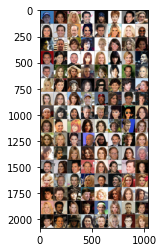

GroundTruth:
tensor([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1], dtype=torch.int32)
Predicted:
tensor([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1], device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
images, labels, _ = iter(validloader).next()

# print images
imshow(torchvision.utils.make_grid(images))
plt.show()

print('GroundTruth:')
print(torch.flatten(labels[:,0]))

outputs = net(get_variable(images))
_, predicted = torch.max(outputs.data, 1)
print('Predicted:')
print(predicted)

In [ ]:
# Validation
correct = 0
total = 0

valid_filenames, valid_labels, valid_gender, valid_outputs = [], [], [], []

net.eval()
with torch.no_grad():
    for data in validloader:
        images, labels, filename = data
        valid_filenames += list(filename)
        valid_labels.extend(torch.flatten(labels[:,0]).tolist())
        valid_gender.extend(torch.flatten(labels[:,1]).tolist())
        labels = torch.flatten(get_variable(labels[:,0]))
        outputs = net(get_variable(Variable(images)))
        valid_outputs.extend(torch.flatten(outputs[:,1]).tolist())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the network on the {} validation images: {:4.2f} %'.format(
    valid_obs, 100 * correct.true_divide(total)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 19867 validation images: 78.06 %


Predicted attractiveness: 0.9999998807907104
Most attractive number 1
Gender: 0


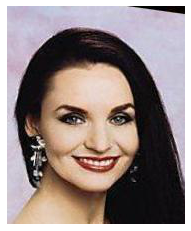

In [ ]:
# The predicted most attractive
sort_idx = np.flip(np.argsort(valid_outputs))

# show images
root = 'images/img_align_celeba/'
choose_idx = 0
image = imread(root+valid_filenames[sort_idx[choose_idx]]) 
plt.imshow(image, cmap='gray')
plt.axis('off')
print('Predicted attractiveness:', valid_outputs[sort_idx[choose_idx]])
print('Most attractive number', choose_idx+1)
print('Gender:', valid_gender[sort_idx[choose_idx]])
#print(test_filenames[sort_idx[choose_idx]])

## Fairness Metrics

In [ ]:
# Group fairness
# Number of males and females:
num_male = sum(valid_gender)
num_female = len(valid_gender)-sum(valid_gender)

# Group Fairness
d1_m, d1_f = 0, 0
att_d1_m, att_d1_f = 0, 0
for i in range(len(valid_gender)):
    if (valid_gender[i] == 1) and (valid_outputs[i] >= 0.5):
        d1_m = d1_m + 1
        if valid_labels[i] == 1:
            att_d1_m = att_d1_m + 1
    if (valid_gender[i] == 0) and (valid_outputs[i] >= 0.5):
        d1_f = d1_f + 1
        if valid_labels[i] == 1:
            att_d1_f = att_d1_f + 1
p_d1_m = d1_m/num_male
p_d1_f = d1_f/num_female
print('GROUP FAIRNESS')
print('P(d=1|G=m)=%.2f'%p_d1_m)
print('P(d=1|G=f)=%.2f'%p_d1_f)
# Predicted Parity
p_att_d1_m = att_d1_m/d1_m
p_att_d1_f = att_d1_f/d1_f
print('PREDICTED PARITY')
print('P(Y=1|d=1,G=m)=%.2f'%p_att_d1_m)
print('P(Y=1|d=1,G=f)=%.2f'%p_att_d1_f)

# Predictive Equality
num_unatt_male, num_unatt_female = 0, 0
d1_unatt_m, d1_unatt_f = 0, 0
for i in range(len(valid_gender)):
    if (valid_gender[i] == 1) and (valid_labels[i] == 0):
        num_unatt_male = num_unatt_male + 1
        if (valid_outputs[i] >= 0.5):
            d1_unatt_m = d1_unatt_m + 1
    if (valid_gender[i] == 0) and (valid_labels[i] == 0):
        num_unatt_female = num_unatt_female + 1
        if (valid_outputs[i] >= 0.5):
            d1_unatt_f = d1_unatt_f + 1
p_d1_unatt_m = d1_unatt_m/num_unatt_male
p_d1_unatt_f = d1_unatt_f/num_unatt_female
print('PREDICTIVE EQUALITY')
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

# Equalized Odd
num_att_male, num_att_female = 0, 0
d1_att_m, d1_att_f = 0, 0
for i in range(len(valid_gender)):
    if (valid_gender[i] == 1) and (valid_labels[i] == 1):
        num_att_male = num_att_male + 1
        if (valid_outputs[i] >= 0.5):
            d1_att_m = d1_att_m + 1
    if (valid_gender[i] == 0) and (valid_labels[i] == 1):
        num_att_female = num_att_female + 1
        if (valid_outputs[i] >= 0.5):
            d1_att_f = d1_att_f + 1
p_d1_att_m = d1_att_m/num_att_male
p_d1_att_f = d1_att_f/num_att_female
print('EQUALIZED ODDS')
print('P(d=1|Y=1,G=m)=%.2f'%p_d1_att_m)
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=1,G=f)=%.2f'%p_d1_att_f)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

GROUP FAIRNESS
P(d=1|G=m)=0.20
P(d=1|G=f)=0.73
PREDICTED PARITY
P(Y=1|d=1,G=m)=0.73
P(Y=1|d=1,G=f)=0.81
PREDICTIVE EQUALITY
P(d=1|Y=0,G=m)=0.08
P(d=1|Y=0,G=f)=0.42
EQUALIZED ODDS
P(d=1|Y=1,G=m)=0.47
P(d=1|Y=0,G=m)=0.08
P(d=1|Y=1,G=f)=0.88
P(d=1|Y=0,G=f)=0.42


In [ ]:
import operator
from sklearn.metrics import *

# Output for male and female
indices_m = [i for i, x in enumerate(valid_gender) if x == 1]
indices_f = [i for i, x in enumerate(valid_gender) if x == 0]
valid_outputs_m = list(operator.itemgetter(*indices_m)(valid_outputs))
valid_outputs_f = list(operator.itemgetter(*indices_f)(valid_outputs))
valid_labels_m = list(operator.itemgetter(*indices_m)(valid_labels))
valid_labels_f = list(operator.itemgetter(*indices_f)(valid_labels))

# Determine TPR and FPR for multiple thresholds
fpr_m, tpr_m, thresholds_m = roc_curve(valid_labels_m, valid_outputs_m, pos_label=1)
fpr_f, tpr_f, thresholds_f = roc_curve(valid_labels_f, valid_outputs_f, pos_label=1)

# tpr_m, fpr_m, tpr_f, fpr_f = [], [], [], []
# threshold = np.linspace(1,0,1000)
# for t in threshold:
#     # Male
#     valid_pred_m = np.array(valid_outputs_m) > t
#     positive_m, TP_m, negative_m, FP_m = 0, 0, 0, 0
#     for i in range(len(valid_pred_m)):
#         if valid_labels_m[i] == 1:
#             positive_m += 1
#             if valid_pred_m[i] == 1:
#                 TP_m += 1
#         if valid_labels_m[i] == 0:
#             negative_m += 1
#             if valid_pred_m[i] == 1:
#                 FP_m += 1
#     tpr_m.append(TP_m/positive_m)
#     fpr_m.append(FP_m/negative_m)

#     # Female
#     valid_pred_f = np.array(valid_outputs_f) > t    
#     positive_f, TP_f, negative_f, FP_f = 0, 0, 0, 0
#     for i in range(len(valid_pred_f)):
#         if valid_labels_f[i] == 1:
#             positive_f += 1
#             if valid_pred_f[i] == 1:
#                 TP_f += 1
#         if valid_labels_f[i] == 0:
#             negative_f += 1
#             if valid_pred_f[i] == 1:
#                 FP_f += 1
#     tpr_f.append(TP_f/positive_f)
#     fpr_f.append(FP_f/negative_f)

In [ ]:
tol = 0.00005

thres_f, thres_m, tpr, fpr = [], [], [], []
for i in range(len(fpr_f)):
    for j in range(len(fpr_m)):
        if fpr_f[i] < (fpr_m[j]+tol) and fpr_f[i] > (fpr_m[j]-tol) and \
         tpr_f[i] < (tpr_m[j]+tol) and tpr_f[i] > (tpr_m[j]-tol) and \
         fpr_m[j] < 0.3 and fpr_m[j] > 0.1:
            thres_f.append(thresholds_f[i])
            thres_m.append(thresholds_m[j])
            fpr.append(fpr_f[i])
            tpr.append(tpr_f[i])

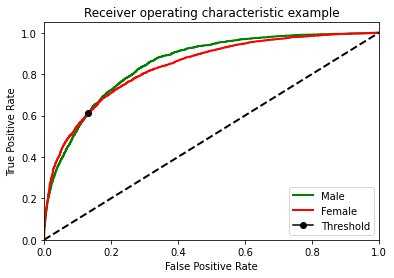

In [ ]:
roc_plot = plt.figure()
lw = 2
plt.plot(fpr_m, tpr_m, color='green',
         lw=lw, label='Male')#'ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr_f, tpr_f, color='red',
         lw=lw, label='Female')#'ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.plot([np.mean(fpr)], [np.mean(tpr)], marker='.', markersize=12, color="black", label='Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
roc_plot.savefig(drive_path+'roc.png', dpi=500)

## Test

In [ ]:
# Test
correct = 0
total = 0

test_filenames, test_labels, test_gender, test_outputs = [], [], [], []

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels, filename = data
        #print(labels[:10,1])
        #print(torch.flatten(labels[:,1]).tolist()[:10])
        test_filenames += list(filename)
        test_labels.extend(torch.flatten(labels[:,0]).tolist())
        test_gender.extend(torch.flatten(labels[:,1]).tolist())
        labels = torch.flatten(get_variable(labels[:,0]))
        outputs = net(get_variable(Variable(images)))
        test_outputs.extend(torch.flatten(outputs[:,1]).tolist())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the network on the {} test images: {:4.2f} %'.format(
    test_obs, 100 * correct.true_divide(total)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 19962 test images: 79.44 %


In [ ]:
indices_m = [i for i, x in enumerate(test_gender) if x == 1]
indices_f = [i for i, x in enumerate(test_gender) if x == 0]
test_outputs_m = list(operator.itemgetter(*indices_m)(test_outputs))
test_outputs_f = list(operator.itemgetter(*indices_f)(test_outputs))
test_labels_m = list(operator.itemgetter(*indices_m)(test_labels))
test_labels_f = list(operator.itemgetter(*indices_f)(test_labels))

test_pred_m = test_outputs_m > np.mean(thres_m)
test_pred_f = test_outputs_f > np.mean(thres_f)
correct_m = (test_pred_m == test_labels_m).sum()
correct_f = (test_pred_f == test_labels_f).sum()

print('Accuracy of the network with threshold {} on the {} male test images: {:4.2f} %'.format(
    np.mean(thres_m), len(indices_m), 100 * correct_m/len(indices_m)))
print('Accuracy of the network with threshold {} on the {} female test images: {:4.2f} %'.format(
    np.mean(thres_f), len(indices_f), 100 * correct_f/(len(indices_f))))
print('Accuracy of the network on the {} test images: {:4.2f} %'.format(
    len(indices_f), 100 * (correct_f+correct_m)/(len(indices_f)+len(indices_m))))

Accuracy of the network with threshold 0.20271947979927063 on the 7715 male test images: 81.98 %
Accuracy of the network with threshold 0.9779426455497742 on the 12247 female test images: 68.75 %
Accuracy of the network on the 12247 test images: 73.87 %


<BarContainer object of 3 artists>

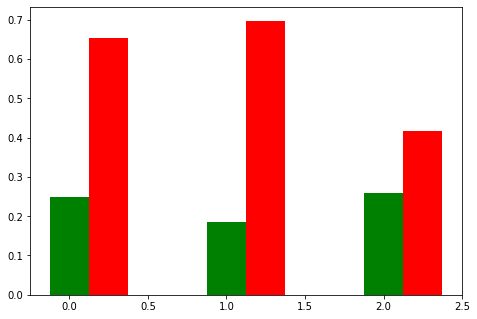

In [ ]:
test_pred_old_m = np.array(test_outputs_m) > 0.5
test_pred_old_f = np.array(test_outputs_f) > 0.5

# data = [[sum(test_labels_m), len(test_labels_m)-sum(test_labels_m), sum(test_labels_f), len(test_labels_f)-sum(test_labels_f)],
#         [sum(test_pred_old_m), len(test_pred_old_m)-sum(test_pred_old_m), sum(test_pred_old_f), len(test_pred_old_f)-sum(test_pred_old_f)],
#         [sum(test_pred_m), len(test_pred_m)-sum(test_pred_m), sum(test_pred_f), len(test_pred_f)-sum(test_pred_f)]]
# data = [[sum(test_labels_m), sum(test_pred_old_m), sum(test_pred_m)],
#         [sum(test_labels_f), sum(test_pred_old_f), sum(test_pred_f)]]
data = [[sum(test_labels_m)/len(test_labels_m), sum(test_pred_old_m)/len(test_pred_old_m), sum(test_pred_m)/len(test_pred_m)],
        [sum(test_labels_f)/len(test_labels_f), sum(test_pred_old_f)/len(test_pred_old_f), sum(test_pred_f)/len(test_pred_f)]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25)
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

Predicted attractiveness: 0.9999997615814209
Most attractive number 1
Gender: 0


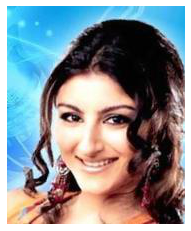

In [ ]:
# The predicted most attractive
sort_idx = np.flip(np.argsort(test_outputs))

# show images
root = 'images/img_align_celeba/'
choose_idx = 0
image = imread(root+test_filenames[sort_idx[choose_idx]]) 
plt.imshow(image, cmap='gray')
plt.axis('off')
print('Predicted attractiveness:', test_outputs[sort_idx[choose_idx]])
print('Most attractive number', choose_idx+1)
print('Gender:', test_gender[sort_idx[choose_idx]])
#print(test_filenames[sort_idx[choose_idx]])

In [ ]:
############## NEW THRESHOLD!!!! ############
# Group fairness
# Number of males and females:
num_male = sum(test_gender)
num_female = len(test_gender)-sum(test_gender)

# Group Fairness
d1_m, d1_f = 0, 0
att_d1_m, att_d1_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_outputs[i] >= np.mean(thres_m)):
        d1_m = d1_m + 1
        if test_labels[i] == 1:
            att_d1_m = att_d1_m + 1
    if (test_gender[i] == 0) and (test_outputs[i] >= np.mean(thres_f)):
        d1_f = d1_f + 1
        if test_labels[i] == 1:
            att_d1_f = att_d1_f + 1
p_d1_m = d1_m/num_male
p_d1_f = d1_f/num_female
print('GROUP FAIRNESS')
print('P(d=1|G=m)=%.2f'%p_d1_m)
print('P(d=1|G=f)=%.2f'%p_d1_f)
# Predicted Parity
p_att_d1_m = att_d1_m/d1_m
p_att_d1_f = att_d1_f/d1_f
print('PREDICTED PARITY')
print('P(Y=1|d=1,G=m)=%.2f'%p_att_d1_m)
print('P(Y=1|d=1,G=f)=%.2f'%p_att_d1_f)

# Predictive Equality
num_unatt_male, num_unatt_female = 0, 0
d1_unatt_m, d1_unatt_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_labels[i] == 0):
        num_unatt_male = num_unatt_male + 1
        if (test_outputs[i] >= np.mean(thres_m)):
            d1_unatt_m = d1_unatt_m + 1
    if (test_gender[i] == 0) and (test_labels[i] == 0):
        num_unatt_female = num_unatt_female + 1
        if (test_outputs[i] >= np.mean(thres_f)):
            d1_unatt_f = d1_unatt_f + 1
p_d1_unatt_m = d1_unatt_m/num_unatt_male
p_d1_unatt_f = d1_unatt_f/num_unatt_female
print('PREDICTIVE EQUALITY')
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

# Equalized Odd
num_att_male, num_att_female = 0, 0
d1_att_m, d1_att_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_labels[i] == 1):
        num_att_male = num_att_male + 1
        if (test_outputs[i] >= np.mean(thres_m)):
            d1_att_m = d1_att_m + 1
    if (test_gender[i] == 0) and (test_labels[i] == 1):
        num_att_female = num_att_female + 1
        if (test_outputs[i] >= np.mean(thres_f)):
            d1_att_f = d1_att_f + 1
p_d1_att_m = d1_att_m/num_att_male
p_d1_att_f = d1_att_f/num_att_female
print('EQUALIZED ODDS')
print('P(d=1|Y=1,G=m)=%.2f'%p_d1_att_m)
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=1,G=f)=%.2f'%p_d1_att_f)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

GROUP FAIRNESS
P(d=1|G=m)=0.26
P(d=1|G=f)=0.42
PREDICTED PARITY
P(Y=1|d=1,G=m)=0.63
P(Y=1|d=1,G=f)=0.91
PREDICTIVE EQUALITY
P(d=1|Y=0,G=m)=0.13
P(d=1|Y=0,G=f)=0.11
EQUALIZED ODDS
P(d=1|Y=1,G=m)=0.66
P(d=1|Y=0,G=m)=0.13
P(d=1|Y=1,G=f)=0.58
P(d=1|Y=0,G=f)=0.11


In [ ]:
####################### OLD THRESHOLD ##################
# Group fairness
# Number of males and females:
num_male = sum(test_gender)
num_female = len(test_gender)-sum(test_gender)

# Group Fairness
d1_m, d1_f = 0, 0
att_d1_m, att_d1_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_outputs[i] >= 0.5):
        d1_m = d1_m + 1
        if test_labels[i] == 1:
            att_d1_m = att_d1_m + 1
    if (test_gender[i] == 0) and (test_outputs[i] >= 0.5):
        d1_f = d1_f + 1
        if test_labels[i] == 1:
            att_d1_f = att_d1_f + 1
p_d1_m = d1_m/num_male
p_d1_f = d1_f/num_female
print('GROUP FAIRNESS')
print('P(d=1|G=m)=%.2f'%p_d1_m)
print('P(d=1|G=f)=%.2f'%p_d1_f)
# Predicted Parity
p_att_d1_m = att_d1_m/d1_m
p_att_d1_f = att_d1_f/d1_f
print('PREDICTED PARITY')
print('P(Y=1|d=1,G=m)=%.2f'%p_att_d1_m)
print('P(Y=1|d=1,G=f)=%.2f'%p_att_d1_f)

# Predictive Equality
num_unatt_male, num_unatt_female = 0, 0
d1_unatt_m, d1_unatt_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_labels[i] == 0):
        num_unatt_male = num_unatt_male + 1
        if (test_outputs[i] >= 0.5):
            d1_unatt_m = d1_unatt_m + 1
    if (test_gender[i] == 0) and (test_labels[i] == 0):
        num_unatt_female = num_unatt_female + 1
        if (test_outputs[i] >= 0.5):
            d1_unatt_f = d1_unatt_f + 1
p_d1_unatt_m = d1_unatt_m/num_unatt_male
p_d1_unatt_f = d1_unatt_f/num_unatt_female
print('PREDICTIVE EQUALITY')
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

# Equalized Odd
num_att_male, num_att_female = 0, 0
d1_att_m, d1_att_f = 0, 0
for i in range(len(test_gender)):
    if (test_gender[i] == 1) and (test_labels[i] == 1):
        num_att_male = num_att_male + 1
        if (test_outputs[i] >= 0.5):
            d1_att_m = d1_att_m + 1
    if (test_gender[i] == 0) and (test_labels[i] == 1):
        num_att_female = num_att_female + 1
        if (test_outputs[i] >= 0.5):
            d1_att_f = d1_att_f + 1
p_d1_att_m = d1_att_m/num_att_male
p_d1_att_f = d1_att_f/num_att_female
print('EQUALIZED ODDS')
print('P(d=1|Y=1,G=m)=%.2f'%p_d1_att_m)
print('P(d=1|Y=0,G=m)=%.2f'%p_d1_unatt_m)
print('P(d=1|Y=1,G=f)=%.2f'%p_d1_att_f)
print('P(d=1|Y=0,G=f)=%.2f'%p_d1_unatt_f)

GROUP FAIRNESS
P(d=1|G=m)=0.18
P(d=1|G=f)=0.70
PREDICTED PARITY
P(Y=1|d=1,G=m)=0.69
P(Y=1|d=1,G=f)=0.81
PREDICTIVE EQUALITY
P(d=1|Y=0,G=m)=0.08
P(d=1|Y=0,G=f)=0.39
EQUALIZED ODDS
P(d=1|Y=1,G=m)=0.52
P(d=1|Y=0,G=m)=0.08
P(d=1|Y=1,G=f)=0.86
P(d=1|Y=0,G=f)=0.39
